# Лабораторная работа 6

In [1]:
!pip install pykeen

### Импорт зависимостей

In [2]:
import torch
import pykeen
import matplotlib.pyplot as plt
from pykeen.pipeline import pipeline
from pykeen.predict import predict_target
from pykeen.evaluation import ClassificationEvaluator

### Создание датасета

In [3]:
from pykeen.datasets import CoDExSmall

In [4]:
dataset = CoDExSmall()

### Инициализация метрик

In [5]:
roc_auc_score = {"ComplEx": [], "HolE": []}
precision = {"ComplEx": [], "HolE": []}
accuracy = {"ComplEx": [], "HolE": []}
f1 = {"ComplEx": [], "HolE": []}

pipeline_results_list = {"ComplEx": [], "HolE": []}

In [6]:
evaluator = ClassificationEvaluator()

### Обучение модели

In [7]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [8]:
# Список значений количества эпох
epochs = [1,20,30]
for model_name in pipeline_results_list.keys():
    for epoch in epochs:

      # Обучаем модель
      pipeline_results = pipeline(
          model=model_name,
          dataset=dataset,
          training_kwargs=dict(num_epochs=epoch),
          device=device
      )

      model = pipeline_results.model
      # Рассчитываем метрики для обученной модели и датасета Nations
      metrics = evaluator.evaluate(model, dataset.testing.mapped_triples,
                                 additional_filter_triples=[dataset.training.mapped_triples,
                                                            dataset.validation.mapped_triples])

      # Сохраняем рассчитанные метрики
      roc_auc_score[model_name].append(metrics.get_metric('roc_auc_score'))
      precision[model_name].append(metrics.get_metric('average_precision_score'))
      accuracy[model_name].append(metrics.get_metric('accuracy_score'))
      f1[model_name].append(metrics.get_metric('f1_score'))
        
      # Получаем доступное отношение и сущность
      available_relation = next(iter(dataset.relation_to_id))
      available_entity = next(iter(dataset.entity_to_id))

        # Используем predict_target с доступным отношением и сущностью
      pred = predict_target(
            model=pipeline_results.model,
            relation=available_relation,
            head=available_entity,
            triples_factory=pipeline_results.training,
        )

      pred_filtered = pred.filter_triples(dataset.training)
      pred_annotated = pred_filtered.add_membership_columns(validation=dataset.validation, testing=dataset.testing)
      pred_df = pred_annotated.df[['tail_label', 'score']]
      print(f'Результат при вычислении {epoch} эпох для сущности "{available_entity}" и отношения "{available_relation}"')
      print(pred_df)
      print('__________________________')
        
      del pipeline_results

No random seed is specified. Setting to 2577313458.


Training epochs on cuda:0:   0%|          | 0/1 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=24.


Evaluating on cuda:0:   0%|          | 0.00/24.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.03s seconds
INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
/home/maxim/workspace/Testing/.venv/lib/python3.10/site-packages/rexmex/metrics/classification.py:484: RuntimeWarning: invalid value encountered in power
  pthr = (fpr**0.5) / (fpr**0.5 + tpr**0.5)
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=24.


Evaluating on cuda:0:   0%|          | 0.00/24.0 [00:00<?, ?triple/s]

/home/maxim/workspace/Testing/.venv/lib/python3.10/site-packages/rexmex/metrics/classification.py:484: RuntimeWarning: invalid value encountered in power
  pthr = (fpr**0.5) / (fpr**0.5 + tpr**0.5)
INFO:pykeen.evaluation.evaluator:Evaluation took 0.04s seconds
INFO:pykeen.pipeline.api:Using device: cuda


Результат при вычислении 1 эпох для сущности "afghanistan" и отношения "locatedin"
                    tail_label      score
237                   tanzania  61.128292
112                     israel  58.985329
15   australia_and_new_zealand  54.695572
115                    jamaica  54.679459
148                     mexico  53.218113
..                         ...        ...
119                 kazakhstan -53.779465
204                 san_marino -55.704895
170                north_korea -56.772110
18                     bahamas -58.852608
156                    morocco -63.752201

[269 rows x 2 columns]
__________________________


Training epochs on cuda:0:   0%|          | 0/20 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=24.


Evaluating on cuda:0:   0%|          | 0.00/24.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.03s seconds
INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
/home/maxim/workspace/Testing/.venv/lib/python3.10/site-packages/rexmex/metrics/classification.py:484: RuntimeWarning: invalid value encountered in power
  pthr = (fpr**0.5) / (fpr**0.5 + tpr**0.5)
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=24.


Evaluating on cuda:0:   0%|          | 0.00/24.0 [00:00<?, ?triple/s]

/home/maxim/workspace/Testing/.venv/lib/python3.10/site-packages/rexmex/metrics/classification.py:484: RuntimeWarning: invalid value encountered in power
  pthr = (fpr**0.5) / (fpr**0.5 + tpr**0.5)
INFO:pykeen.evaluation.evaluator:Evaluation took 0.04s seconds
INFO:pykeen.pipeline.api:Using device: cuda


Результат при вычислении 20 эпох для сущности "afghanistan" и отношения "locatedin"
           tail_label      score
140              mali  89.956009
256           uruguay  67.728294
239       timor-leste  67.396408
82             france  65.142212
72        el_salvador  63.502598
..                ...        ...
246      turkmenistan -61.298744
195            rwanda -61.914925
42          caribbean -62.503258
168              niue -65.471313
182  papua_new_guinea -74.045502

[269 rows x 2 columns]
__________________________


Training epochs on cuda:0:   0%|          | 0/30 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=24.


Evaluating on cuda:0:   0%|          | 0.00/24.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.03s seconds
INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=24.


Evaluating on cuda:0:   0%|          | 0.00/24.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.04s seconds
INFO:pykeen.pipeline.api:Using device: cuda


Результат при вычислении 30 эпох для сущности "afghanistan" и отношения "locatedin"
    tail_label      score
109       iraq  82.955612
101      haiti  69.979439
66    dr_congo  61.839485
145  mauritius  60.108299
104    hungary  59.137291
..         ...        ...
50       china -55.225273
97    guernsey -56.429626
28     bolivia -56.802532
121   kiribati -57.203773
245     turkey -67.650208

[269 rows x 2 columns]
__________________________


Training epochs on cuda:0:   0%|          | 0/1 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=24.


Evaluating on cuda:0:   0%|          | 0.00/24.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.03s seconds
INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=24.


Evaluating on cuda:0:   0%|          | 0.00/24.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.04s seconds
INFO:pykeen.pipeline.api:Using device: cuda


Результат при вычислении 1 эпох для сущности "afghanistan" и отношения "locatedin"
                       tail_label     score
245                        turkey  0.273372
70                        ecuador  0.268192
109                          iraq  0.253523
66                       dr_congo  0.232729
73              equatorial_guinea  0.214846
..                            ...       ...
200                  saint_martin -0.202532
255  united_states_virgin_islands -0.208418
132                     lithuania -0.211990
37                        burundi -0.261512
58                           cuba -0.291170

[269 rows x 2 columns]
__________________________


Training epochs on cuda:0:   0%|          | 0/20 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=24.


Evaluating on cuda:0:   0%|          | 0.00/24.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.03s seconds
INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
/home/maxim/workspace/Testing/.venv/lib/python3.10/site-packages/rexmex/metrics/classification.py:484: RuntimeWarning: invalid value encountered in power
  pthr = (fpr**0.5) / (fpr**0.5 + tpr**0.5)
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=24.


Evaluating on cuda:0:   0%|          | 0.00/24.0 [00:00<?, ?triple/s]

/home/maxim/workspace/Testing/.venv/lib/python3.10/site-packages/rexmex/metrics/classification.py:484: RuntimeWarning: invalid value encountered in power
  pthr = (fpr**0.5) / (fpr**0.5 + tpr**0.5)
INFO:pykeen.evaluation.evaluator:Evaluation took 0.04s seconds
INFO:pykeen.pipeline.api:Using device: cuda


Результат при вычислении 20 эпох для сущности "afghanistan" и отношения "locatedin"
                               tail_label     score
232                           switzerland  0.450132
61                                czechia  0.449562
16                                austria  0.437756
248                                tuvalu  0.396986
131                         liechtenstein  0.379101
..                                    ...       ...
254  united_states_minor_outlying_islands -0.339983
261                               vietnam -0.362376
77                                 europe -0.379793
134                                 macau -0.394077
195                                rwanda -0.439826

[269 rows x 2 columns]
__________________________


Training epochs on cuda:0:   0%|          | 0/30 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=24.


Evaluating on cuda:0:   0%|          | 0.00/24.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.03s seconds
INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
/home/maxim/workspace/Testing/.venv/lib/python3.10/site-packages/rexmex/metrics/classification.py:484: RuntimeWarning: invalid value encountered in power
  pthr = (fpr**0.5) / (fpr**0.5 + tpr**0.5)
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=24.


Evaluating on cuda:0:   0%|          | 0.00/24.0 [00:00<?, ?triple/s]

/home/maxim/workspace/Testing/.venv/lib/python3.10/site-packages/rexmex/metrics/classification.py:484: RuntimeWarning: invalid value encountered in power
  pthr = (fpr**0.5) / (fpr**0.5 + tpr**0.5)
INFO:pykeen.evaluation.evaluator:Evaluation took 0.04s seconds


Результат при вычислении 30 эпох для сущности "afghanistan" и отношения "locatedin"
           tail_label     score
172  northern_america  0.975817
105           iceland  0.755440
78   falkland_islands  0.734503
132         lithuania  0.645100
28            bolivia  0.578464
..                ...       ...
178          pakistan -0.620070
235            taiwan -0.620400
210         singapore -0.637262
246      turkmenistan -0.648040
176           oceania -0.665094

[269 rows x 2 columns]
__________________________


### Отображение метрик

In [9]:
def draw_metrics(roc_auc_score, precision, accuracy, f1, name):
    # В качесте лейблов используем список значений эпох
    labels = epochs

    # Plotting ROC AUC scores
    plt.plot(labels, roc_auc_score[name], label='ROC_AUC')

    # Plotting precision scores
    plt.plot(labels, precision[name], label='Precision')

    # Plotting accuracy scores
    plt.plot(labels, accuracy[name], label='Accuracy')

    # Plotting F1
    plt.plot(labels, f1[name], label='F1')

    # Добавляем легенду, лейблы и название
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel('Scores')
    plt.title('Model Evaluation Metrics for ' + name)

    # Отрисовываем график
    plt.show()

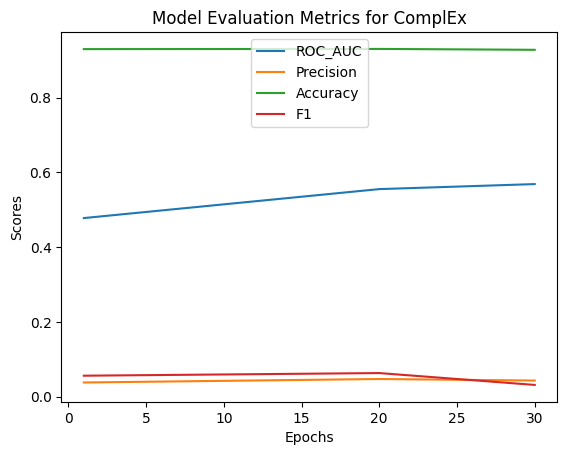

In [10]:
draw_metrics(roc_auc_score, precision, accuracy, f1, "ComplEx")

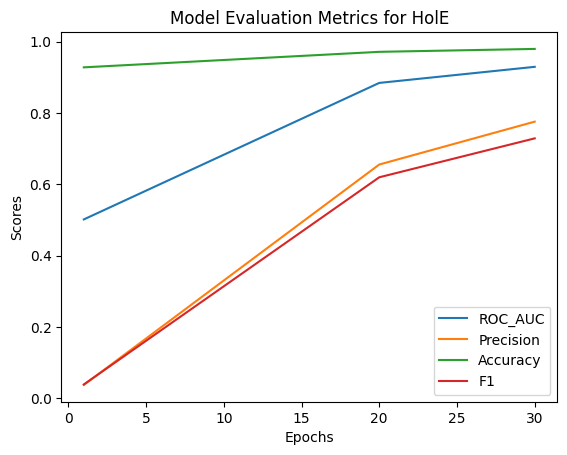

In [11]:
draw_metrics(roc_auc_score, precision, accuracy, f1, "HolE")

### Link Prediction

In [12]:
def print_prediction_results(name):
    print(f'Модель {name}')
    print('---------------------')
    for idx, ep in enumerate(epochs):
        pipeline_result = pipeline_results_list[name][idx]

        # Получаем доступное отношение и сущность
        available_relation = next(iter(dataset.relation_to_id))
        available_entity = next(iter(dataset.entity_to_id))

        # Используем predict_target с доступным отношением и сущностью
        pred = predict_target(
            model=pipeline_result.model,
            relation=available_relation,
            head=available_entity,
            triples_factory=pipeline_result.training,
        )

        pred_filtered = pred.filter_triples(dataset.training)
        pred_annotated = pred_filtered.add_membership_columns(validation=dataset.validation, testing=dataset.testing)
        pred_df = pred_annotated.df[['tail_label', 'score']]
        print(f'Результат при вычислении {ep} эпох для сущности "{available_entity}" и отношения "{available_relation}"')
        print(pred_df)
        print('__________________________')

In [13]:
print_prediction_results("ComplEx")

Модель ComplEx
---------------------


IndexError: list index out of range

In [ ]:
print_prediction_results("HolE")